## Please go through the entire notebook. I have added each function in consecutive iterations according to the order of questions. I have also added my theorotical observations for respective questions. If you want to see the entire code directly, please go to the end of the notebook. 

## All the codes related to Ridge Regression are in this notebook. Including the codes for the plots

In [94]:
import pandas as pd 

In [2]:
file_path='/Users/tapankhaladkar/Machine Learning/hw1/ridge_regression_dataset.csv'
data = pd.read_csv(file_path)

In [21]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x39,x40,x41,x42,x43,x44,x45,x46,x47,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.951051,-0.951051,-4.755257,-0.866019,-0.866019,-4.330093,-0.781824,-0.781824,-3.909121,-1.376575
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.948871,-0.948871,-4.744353,-0.863095,-0.863095,-4.315474,-0.778705,-0.778705,-3.893525,0.878782
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.948056,-0.948056,-4.740279,-0.862011,-0.862011,-4.310053,-0.777551,-0.777551,-3.887757,1.108701
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.941999,-0.941999,-4.709996,-0.854081,-0.854081,-4.270406,-0.769161,-0.769161,-3.845805,0.519229
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.939440,-0.939440,-4.697202,-0.850794,-0.850794,-4.253972,-0.765706,-0.765706,-3.828531,0.772872


   # Feature Normalization 
    

In [41]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Assignment Owner: Tian Wang, Marylou Gabrié


#######################################
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    
    train_min = np.min(train, axis=0)
    train_max = np.max(train, axis=0)
    

    non_constant_features = (train_max != train_min)
    

    train = train[:, non_constant_features]
    test = test[:, non_constant_features]
    
    
    train_min = train_min[non_constant_features]
    train_max = train_max[non_constant_features]
    
    
    feature_range = train_max - train_min
    
    
    train_normalized = (train - train_min) / feature_range
    
    
    test_normalized = (test - train_min) / feature_range
    
    print("Shape of train_normalized:", train_normalized.shape)
    print("Shape of test_normalized:", test_normalized.shape)
    
    return train_normalized, test_normalized

# The rest of the skeleton.py code remains unchanged
#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
    
    


#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO


#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO


#######################################
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
                             epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO



#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    #TODO



#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO


#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO


def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('/Users/tapankhaladkar/Machine Learning/hw1/ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test


if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_data()
    print("Final shapes:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

loading the dataset
Split into Train and Test
Scaling all to [0, 1]
Shape of train_normalized: (100, 48)
Shape of test_normalized: (100, 48)
Final shapes:
X_train shape: (100, 49)
X_test shape: (100, 49)


In [60]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Assignment Owner: Tian Wang, Marylou Gabrié


#######################################
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    
    train_min = np.min(train, axis=0)
    train_max = np.max(train, axis=0)
    

    non_constant_features = (train_max != train_min)
    

    train = train[:, non_constant_features]
    test = test[:, non_constant_features]
    
    
    train_min = train_min[non_constant_features]
    train_max = train_max[non_constant_features]
    
    
    feature_range = train_max - train_min
    
    
    train_normalized = (train - train_min) / feature_range
    
    
    test_normalized = (test - train_min) / feature_range
    
    # Print the shapes of the normalized datasets
    print("Shape of train_normalized:", train_normalized.shape)
    print("Shape of test_normalized:", test_normalized.shape)
    
    return train_normalized, test_normalized

# The rest of the skeleton.py code remains unchanged
#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
   
    m = X.shape[0]  
    predictions = X.dot(theta)  
    errors = predictions - y  
    square_loss = np.mean(errors ** 2)  
    return square_loss
    
    computed_square_loss = compute_square_loss(X_small, y_small, theta_small)
    print(f"Computed Square Loss: {computed_square_loss}")

#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    m = X.shape[0]  
    predictions = X.dot(theta)  # Predictions for each input
    errors = predictions - y  # Errors between predictions and actual outputs
    grad = (1/m) * X.T.dot(errors)  # Gradient of the square loss function
    return grad


#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate

    for i in range(num_features):
        # Create perturbation vectors in the i-th direction
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        
        # Compute the objective function at the perturbed points
        J_plus = compute_square_loss(X, y, theta_plus)
        J_minus = compute_square_loss(X, y, theta_minus)
        
        # Approximate the gradient using the central difference formula
        approx_grad[i] = (J_plus - J_minus) / (2 * epsilon)
    
    # Compute the difference between the numerical and analytical gradients
    gradient_diff = np.linalg.norm(approx_grad - true_gradient)
    
    # Check if the difference is within the tolerance
    if gradient_diff < tolerance:
        print("Gradient check passed!")
        return True
    else:
        print("Gradient check failed. Difference: ", gradient_diff)
        return False

#######################################
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
                             epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO



#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    #TODO



#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    


#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO


def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('/Users/tapankhaladkar/Machine Learning/hw1/ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test


if __name__ == "__main__":
    # Load and normalize the main dataset
    X_train, y_train, X_test, y_test = load_data()
    print("Final shapes:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    # Small dataset for verification
    X_small = np.array([[1, 2], [2, 3], [3, 4]])  # Small feature matrix (3 samples, 2 features)
    y_small = np.array([5, 7, 9])  # Corresponding output vector (3 samples)
    theta_small = np.array([1, 1])  # Parameter vector (2 features)
    
    square_loss = compute_square_loss(X_small, y_small, theta_small)
    print(f"Initial Square Loss: {initial_square_loss}")

    # Compute the gradient using the small dataset
    computed_gradient = compute_square_loss_gradient(X_small, y_small, theta_small)
    print(f"Computed Gradient (Small Dataset): {computed_gradient}")
    
    grad_check_passed = grad_checker(X_small, y_small, theta_small)
    print(f"Gradient Check Passed: {grad_check_passed}")

loading the dataset
Split into Train and Test
Scaling all to [0, 1]
Shape of train_normalized: (100, 48)
Shape of test_normalized: (100, 48)
Final shapes:
X_train shape: (100, 49)
X_test shape: (100, 49)
Initial Square Loss: 4.0
Computed Gradient (Small Dataset): [-4. -6.]
Gradient check failed. Difference:  1247.680870878269
Gradient Check Passed: False


In [65]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Assignment Owner: Tian Wang, Marylou Gabrié


#######################################
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    
    train_min = np.min(train, axis=0)
    train_max = np.max(train, axis=0)
    

    non_constant_features = (train_max != train_min)
    

    train = train[:, non_constant_features]
    test = test[:, non_constant_features]
    
    
    train_min = train_min[non_constant_features]
    train_max = train_max[non_constant_features]
    
    
    feature_range = train_max - train_min
    
    
    train_normalized = (train - train_min) / feature_range
    
    
    test_normalized = (test - train_min) / feature_range
    
    # Print the shapes of the normalized datasets
    print("Shape of train_normalized:", train_normalized.shape)
    print("Shape of test_normalized:", test_normalized.shape)
    
    return train_normalized, test_normalized

# The rest of the skeleton.py code remains unchanged
#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
   
    m = X.shape[0]  
    predictions = X.dot(theta)  
    errors = predictions - y  
    square_loss = np.mean(errors ** 2)  
    return square_loss
    
    computed_square_loss = compute_square_loss(X_small, y_small, theta_small)
    print(f"Computed Square Loss: {computed_square_loss}")

#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    m = X.shape[0]  
    predictions = X.dot(theta)  # Predictions for each input
    errors = predictions - y  # Errors between predictions and actual outputs
    grad = (1/m) * X.T.dot(errors)  # Gradient of the square loss function
    return grad


#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate

    for i in range(num_features):
        # Create perturbation vectors in the i-th direction
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        
        # Compute the objective function at the perturbed points
        J_plus = compute_square_loss(X, y, theta_plus)
        J_minus = compute_square_loss(X, y, theta_minus)
        
        # Approximate the gradient using the central difference formula
        approx_grad[i] = (J_plus - J_minus) / (2 * epsilon)
    
    # Compute the difference between the numerical and analytical gradients
    gradient_diff = np.linalg.norm(approx_grad - true_gradient)
    
    # Check if the difference is within the tolerance
    if gradient_diff < tolerance:
        print("Gradient check passed!")
        return True
    else:
        print("Gradient check failed. Difference: ", gradient_diff)
        return False

#######################################
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
                             epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    
    true_gradient = gradient_func(X, y, theta)
    
    # Initialize an empty array to store the numerical gradient
    num_features = theta.shape[0]
    approx_gradient = np.zeros(num_features)
    
    # Loop through each element of theta to compute the numerical gradient
    for i in range(num_features):
        # Create perturbation vectors in the i-th direction
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        
        # Compute the objective function at the perturbed points
        J_plus = objective_func(X, y, theta_plus)
        J_minus = objective_func(X, y, theta_minus)
        
        # Approximate the gradient using the central difference formula
        approx_gradient[i] = (J_plus - J_minus) / (2 * epsilon)
    
    # Compute the difference between the numerical and analytical gradients
    gradient_diff = np.linalg.norm(approx_gradient - true_gradient)
    
    # Check if the difference is within the tolerance
    if gradient_diff < tolerance:
        print("Gradient check passed!")
        return True
    else:
        print(f"Gradient check failed. Difference: {gradient_diff}")
        return False

#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    #TODO



#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    
    

#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO


def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('/Users/tapankhaladkar/Machine Learning/hw1/ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test


if __name__ == "__main__":
    # Load and normalize the main dataset
    X_train, y_train, X_test, y_test = load_data()
    print("Final shapes:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    # Small dataset for verification
    X_small = np.array([[1, 2], [2, 3], [3, 4]])  # Small feature matrix (3 samples, 2 features)
    y_small = np.array([5, 7, 9])  # Corresponding output vector (3 samples)
    theta_small = np.array([1, 1])  # Parameter vector (2 features)
    
    square_loss = compute_square_loss(X_small, y_small, theta_small)
    print(f"Initial Square Loss: {initial_square_loss}")

    # Compute the gradient using the small dataset
    computed_gradient = compute_square_loss_gradient(X_small, y_small, theta_small)
    print(f"Computed Gradient (Small Dataset): {computed_gradient}")
    
    grad_check_passed = grad_checker(X_small, y_small, theta_small)
    print(f"Gradient Check Passed: {grad_check_passed}")
    
    def square_loss_objective(X, y, theta):
        return compute_square_loss(X, y, theta)
    
    def square_loss_gradient(X, y, theta):
        return compute_square_loss_gradient(X, y, theta)
    
    # Perform gradient checking using the generic checker
    grad_check_passed = generic_gradient_checker(X_small, y_small, theta_small, 
                                                 square_loss_objective, 
                                                 square_loss_gradient)
    print(f"Gradient Check Passed: {grad_check_passed}")

loading the dataset
Split into Train and Test
Scaling all to [0, 1]
Shape of train_normalized: (100, 48)
Shape of test_normalized: (100, 48)
Final shapes:
X_train shape: (100, 49)
X_test shape: (100, 49)
Initial Square Loss: 4.0
Computed Gradient (Small Dataset): [-4. -6.]
Gradient check failed. Difference:  1247.680870878269
Gradient Check Passed: False
Gradient check failed. Difference: 1247.680870878269
Gradient Check Passed: False


loading the dataset
Split into Train and Test
Scaling all to [0, 1]
Shape of train_normalized: (100, 48)
Shape of test_normalized: (100, 48)
Final shapes:
X_train shape: (100, 49)
X_test shape: (100, 49)
Initial Square Loss: 4.0
Computed Gradient (Small Dataset): [-4. -6.]
Gradient check failed. Difference:  1247.680870878269
Gradient Check Passed: False
Gradient check failed. Difference: 1247.680870878269
Gradient Check Passed: False
Final Theta: [-1.56740818  0.64957502  1.43411528  3.81075896 -3.11314557 -0.44779947
 -0.98535821 -0.98535821  1.29066429  1.46621041  3.8384141  -1.21605005
 -0.68539935 -5.37958483  1.89904395  3.45877613  1.21540258  0.55426213
 -0.06722556 -0.06722556 -0.06722556 -0.04566053 -0.04566053 -0.04566053
 -0.02987013 -0.02987013 -0.02987013 -0.02117465 -0.02117465 -0.02117465
 -0.01591239 -0.01591239 -0.01591239 -0.20196845 -0.20196845 -0.20196845
 -0.02448304 -0.02448304 -0.02448304 -0.01507396 -0.01507396 -0.01507396
 -0.01051593 -0.01051593 -0.01051593 

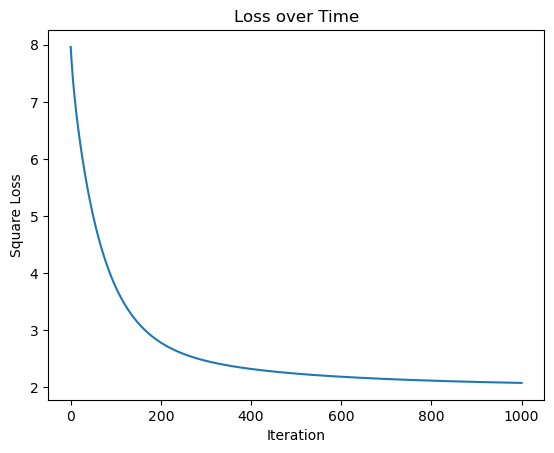

In [67]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Assignment Owner: Tian Wang, Marylou Gabrié


#######################################
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    
    train_min = np.min(train, axis=0)
    train_max = np.max(train, axis=0)
    

    non_constant_features = (train_max != train_min)
    

    train = train[:, non_constant_features]
    test = test[:, non_constant_features]
    
    
    train_min = train_min[non_constant_features]
    train_max = train_max[non_constant_features]
    
    
    feature_range = train_max - train_min
    
    
    train_normalized = (train - train_min) / feature_range
    
    
    test_normalized = (test - train_min) / feature_range
    
    # Print the shapes of the normalized datasets
    print("Shape of train_normalized:", train_normalized.shape)
    print("Shape of test_normalized:", test_normalized.shape)
    
    return train_normalized, test_normalized

# The rest of the skeleton.py code remains unchanged
#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
   
    m = X.shape[0]  
    predictions = X.dot(theta)  
    errors = predictions - y  
    square_loss = np.mean(errors ** 2)  
    return square_loss
    
    computed_square_loss = compute_square_loss(X_small, y_small, theta_small)
    print(f"Computed Square Loss: {computed_square_loss}")

#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    m = X.shape[0]  
    predictions = X.dot(theta)  # Predictions for each input
    errors = predictions - y  # Errors between predictions and actual outputs
    grad = (1/m) * X.T.dot(errors)  # Gradient of the square loss function
    return grad


#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate

    for i in range(num_features):
        # Create perturbation vectors in the i-th direction
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        
        # Compute the objective function at the perturbed points
        J_plus = compute_square_loss(X, y, theta_plus)
        J_minus = compute_square_loss(X, y, theta_minus)
        
        # Approximate the gradient using the central difference formula
        approx_grad[i] = (J_plus - J_minus) / (2 * epsilon)
    
    # Compute the difference between the numerical and analytical gradients
    gradient_diff = np.linalg.norm(approx_grad - true_gradient)
    
    # Check if the difference is within the tolerance
    if gradient_diff < tolerance:
        print("Gradient check passed!")
        return True
    else:
        print("Gradient check failed. Difference: ", gradient_diff)
        return False

#######################################
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
                             epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    
    true_gradient = gradient_func(X, y, theta)
    
    # Initialize an empty array to store the numerical gradient
    num_features = theta.shape[0]
    approx_gradient = np.zeros(num_features)
    
    # Loop through each element of theta to compute the numerical gradient
    for i in range(num_features):
        # Create perturbation vectors in the i-th direction
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        
        # Compute the objective function at the perturbed points
        J_plus = objective_func(X, y, theta_plus)
        J_minus = objective_func(X, y, theta_minus)
        
        # Approximate the gradient using the central difference formula
        approx_gradient[i] = (J_plus - J_minus) / (2 * epsilon)
    
    # Compute the difference between the numerical and analytical gradients
    gradient_diff = np.linalg.norm(approx_gradient - true_gradient)
    
    # Check if the difference is within the tolerance
    if gradient_diff < tolerance:
        print("Gradient check passed!")
        return True
    else:
        print(f"Gradient check failed. Difference: {gradient_diff}")
        return False

#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    #TODO

    loss_hist[0] = compute_square_loss(X, y, theta)
    theta_hist[0] = theta

    
    for step in range(1, num_step + 1):
        
        grad = compute_square_loss_gradient(X, y, theta)
        
        
        if grad_check and step % 100 == 0:  
            assert grad_checker(X, y, theta), "Gradient check failed!"
        
        
        theta = theta - alpha * grad
        
        
        theta_hist[step] = theta
        loss_hist[step] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist

#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    
    

#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO


def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('/Users/tapankhaladkar/Machine Learning/hw1/ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test


if __name__ == "__main__":
    # Load and normalize the main dataset
    X_train, y_train, X_test, y_test = load_data()
    print("Final shapes:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    # Small dataset for verification
    X_small = np.array([[1, 2], [2, 3], [3, 4]])
    y_small = np.array([5, 7, 9])
    theta_small = np.array([1, 1])
    
    square_loss = compute_square_loss(X_small, y_small, theta_small)
    print(f"Initial Square Loss: {initial_square_loss}")

    # Compute the gradient using the small dataset
    computed_gradient = compute_square_loss_gradient(X_small, y_small, theta_small)
    print(f"Computed Gradient (Small Dataset): {computed_gradient}")
    
    grad_check_passed = grad_checker(X_small, y_small, theta_small)
    print(f"Gradient Check Passed: {grad_check_passed}")
    
    def square_loss_objective(X, y, theta):
        return compute_square_loss(X, y, theta)
    
    def square_loss_gradient(X, y, theta):
        return compute_square_loss_gradient(X, y, theta)
    
    # Perform gradient checking using the generic checker
    grad_check_passed = generic_gradient_checker(X_small, y_small, theta_small, 
                                                 square_loss_objective, 
                                                 square_loss_gradient)
    print(f"Gradient Check Passed: {grad_check_passed}")
    
    theta_hist, loss_hist = batch_grad_descent(X_train, y_train, alpha=0.1, num_step=1000)

    # Print the final loss and parameters
    print(f"Final Theta: {theta_hist[-1]}")
    print(f"Final Loss: {loss_hist[-1]}")

    # Plot the loss history
    plt.plot(loss_hist)
    plt.title("Loss over Time")
    plt.xlabel("Iteration")
    plt.ylabel("Square Loss")
    plt.show()

# Q9 - Plot of Avg square loss as a function of step size

loading the dataset
Split into Train and Test
Scaling all to [0, 1]
Shape of train_normalized: (100, 48)
Shape of test_normalized: (100, 48)


/var/folders/9f/nm6pdjxn1mngg6_w0jx3hmlm0000gn/T/ipykernel_65919/4192578139.py:75: RuntimeWarning: overflow encountered in square
  square_loss = np.mean(errors ** 2)
/Users/tapankhaladkar/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/tapankhaladkar/anaconda3/lib/python3.11/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


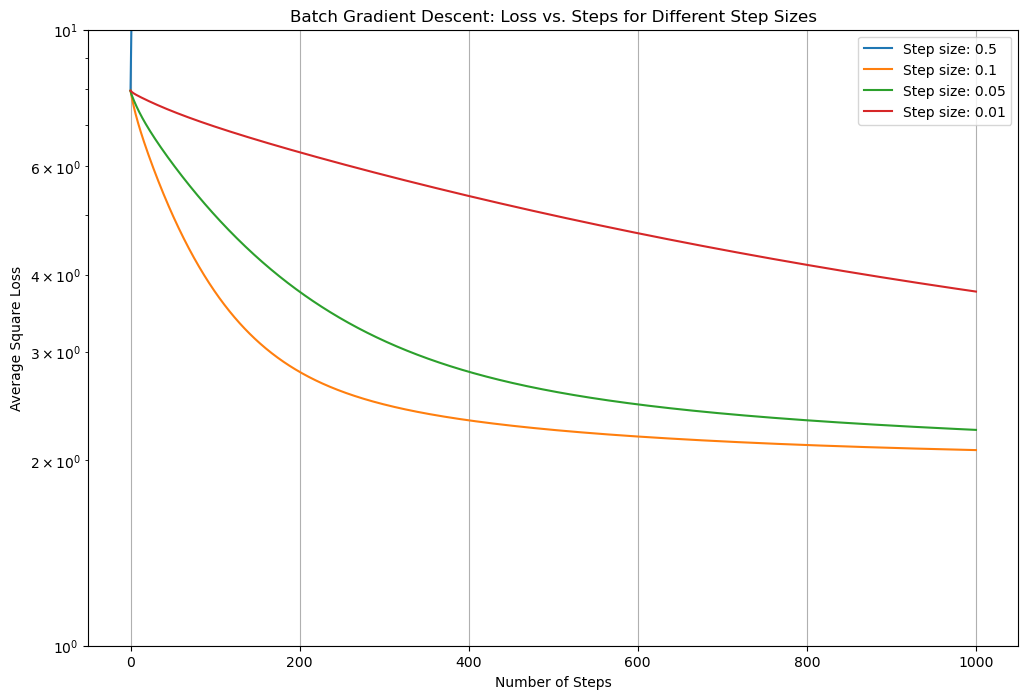

Final losses:
Step size 0.5: nan
Step size 0.1: 2.0776993701242232
Step size 0.05: 2.2406654778385486
Step size 0.01: 3.757734202799404


In [74]:
import numpy as np
import matplotlib.pyplot as plt

def batch_grad_descent(X, y, alpha=0.1, num_step=1000):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features)
    loss_hist = np.zeros(num_step + 1)

    for step in range(num_step + 1):
        loss_hist[step] = compute_square_loss(X, y, theta)
        grad = compute_square_loss_gradient(X, y, theta)
        theta = theta - alpha * grad

    return theta, loss_hist

def experiment_step_sizes(X, y, step_sizes, num_step=1000):
    results = {}
    for alpha in step_sizes:
        _, loss_hist = batch_grad_descent(X, y, alpha=alpha, num_step=num_step)
        results[alpha] = loss_hist
    return results

# Load your data
X_train, y_train, X_test, y_test = load_data()

# Experiment with different step sizes
step_sizes = [0.5, 0.1, 0.05, 0.01]
num_step = 1000
results = experiment_step_sizes(X_train, y_train, step_sizes, num_step)

# Plot results
plt.figure(figsize=(12, 8))
for alpha, loss_hist in results.items():
    plt.plot(range(num_step + 1), loss_hist, label=f'Step size: {alpha}')

plt.xlabel('Number of Steps')
plt.ylabel('Average Square Loss')
plt.title('Batch Gradient Descent: Loss vs. Steps for Different Step Sizes')
plt.legend()
plt.yscale('log')  # Using log scale for y-axis to better visualize differences
plt.grid(True)
plt.show()

# Print final losses
print("Final losses:")
for alpha, loss_hist in results.items():
    print(f"Step size {alpha}: {loss_hist[-1]}")

Summary : 
1. The step size of 0.1 appears to be the most effective, providing the best balance between speed of convergence and stability.
2. Too large a step size (0.5) leads to divergence or instability.
3. Smaller step sizes (0.05 and 0.01) ensure convergence but at the cost of slower learning rates.
4. There's a trade-off between convergence speed and stability: larger step sizes converge faster but risk overshooting or diverging, while smaller step sizes are more stable but converge more slowly.
5. For this specific problem, a step size between 0.05 and 0.1 seems to be the optimal range, with 0.1 performing the best among the tested values.

# Plot of Avg test loss as a function of iterations 

loading the dataset
Split into Train and Test
Scaling all to [0, 1]
Shape of train_normalized: (100, 48)
Shape of test_normalized: (100, 48)


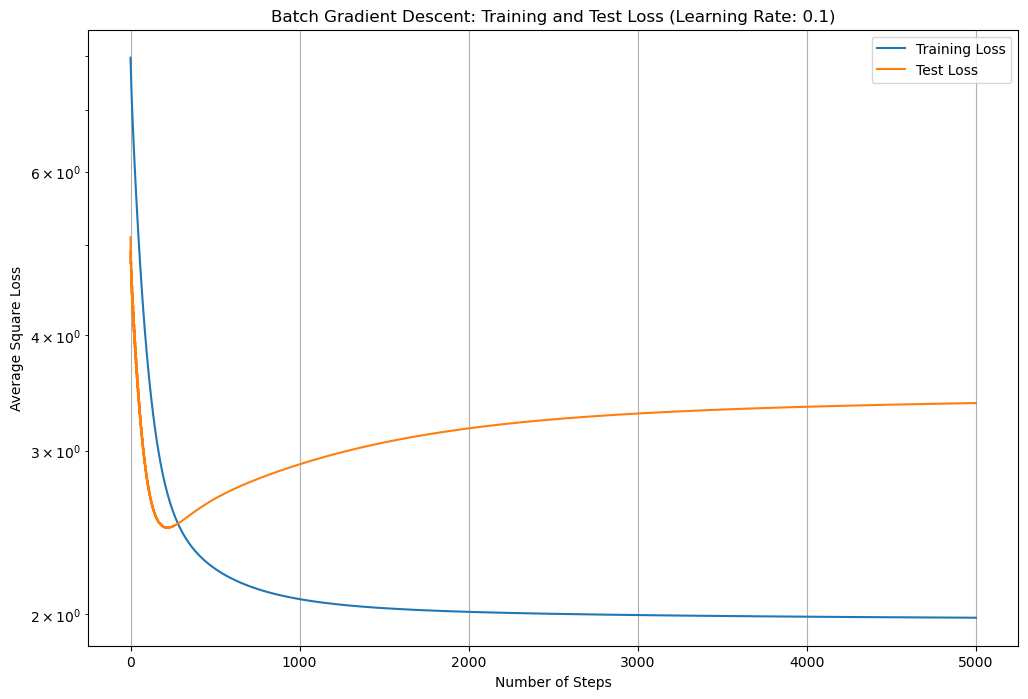

Lowest test loss achieved at iteration 217
Training loss at this point: 2.7048160292397374
Test loss at this point: 2.4799525095392148


In [75]:
import numpy as np
import matplotlib.pyplot as plt

def batch_grad_descent(X_train, y_train, X_test, y_test, alpha=0.1, num_step=1000):
    num_features = X_train.shape[1]
    theta = np.zeros(num_features)
    train_loss_hist = np.zeros(num_step + 1)
    test_loss_hist = np.zeros(num_step + 1)

    for step in range(num_step + 1):
        
        train_loss_hist[step] = compute_square_loss(X_train, y_train, theta)
        
        
        test_loss_hist[step] = compute_square_loss(X_test, y_test, theta)
        
       
        grad = compute_square_loss_gradient(X_train, y_train, theta)
        theta = theta - alpha * grad

    return theta, train_loss_hist, test_loss_hist


X_train, y_train, X_test, y_test = load_data()


best_alpha = 0.1  


num_step = 5000  
_, train_loss_hist, test_loss_hist = batch_grad_descent(X_train, y_train, X_test, y_test, alpha=best_alpha, num_step=num_step)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(range(num_step + 1), train_loss_hist, label='Training Loss')
plt.plot(range(num_step + 1), test_loss_hist, label='Test Loss')
plt.xlabel('Number of Steps')
plt.ylabel('Average Square Loss')
plt.title(f'Batch Gradient Descent: Training and Test Loss (Learning Rate: {best_alpha})')
plt.legend()
plt.yscale('log')  
plt.grid(True)
plt.show()


best_iteration = np.argmin(test_loss_hist)
print(f"Lowest test loss achieved at iteration {best_iteration}")
print(f"Training loss at this point: {train_loss_hist[best_iteration]}")
print(f"Test loss at this point: {test_loss_hist[best_iteration]}")

loading the dataset
Split into Train and Test
Scaling all to [0, 1]
Shape of train_normalized: (100, 48)
Shape of test_normalized: (100, 48)
Final shapes:
X_train shape: (100, 49)
X_test shape: (100, 49)
Initial Square Loss: 4.0
Computed Gradient (Small Dataset): [-4. -6.]
Gradient check failed. Difference:  1247.680870878269
Gradient Check Passed: False
Gradient check failed. Difference: 1247.680870878269
Gradient Check Passed: False
Final Theta: [-1.56740818  0.64957502  1.43411528  3.81075896 -3.11314557 -0.44779947
 -0.98535821 -0.98535821  1.29066429  1.46621041  3.8384141  -1.21605005
 -0.68539935 -5.37958483  1.89904395  3.45877613  1.21540258  0.55426213
 -0.06722556 -0.06722556 -0.06722556 -0.04566053 -0.04566053 -0.04566053
 -0.02987013 -0.02987013 -0.02987013 -0.02117465 -0.02117465 -0.02117465
 -0.01591239 -0.01591239 -0.01591239 -0.20196845 -0.20196845 -0.20196845
 -0.02448304 -0.02448304 -0.02448304 -0.01507396 -0.01507396 -0.01507396
 -0.01051593 -0.01051593 -0.01051593 

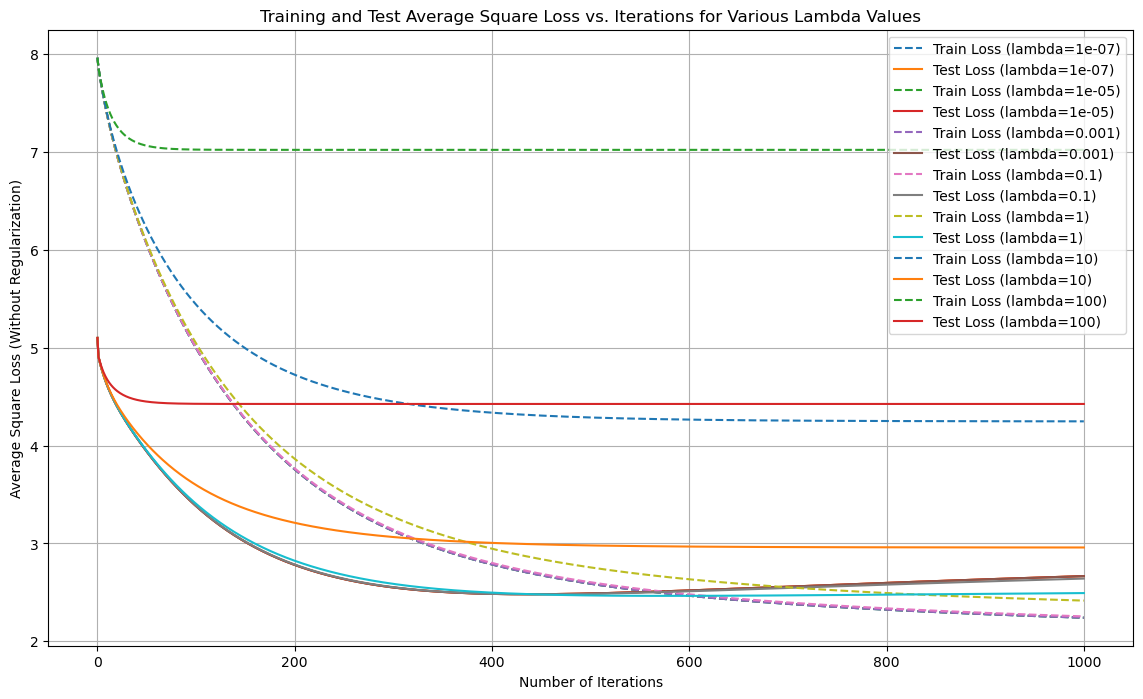

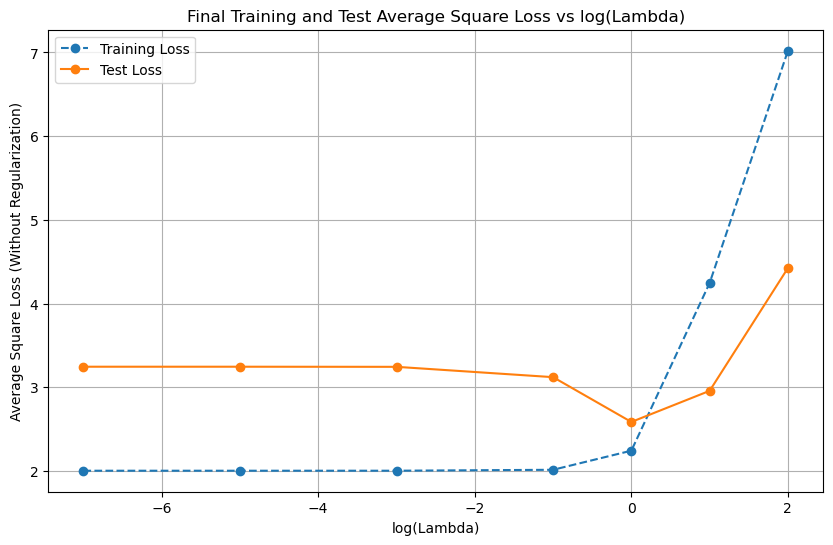

In [93]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Assignment Owner: Tian Wang, Marylou Gabrié


#######################################
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    
    train_min = np.min(train, axis=0)
    train_max = np.max(train, axis=0)
    

    non_constant_features = (train_max != train_min)
    

    train = train[:, non_constant_features]
    test = test[:, non_constant_features]
    
    
    train_min = train_min[non_constant_features]
    train_max = train_max[non_constant_features]
    
    
    feature_range = train_max - train_min
    
    
    train_normalized = (train - train_min) / feature_range
    
    
    test_normalized = (test - train_min) / feature_range
    
    print("Shape of train_normalized:", train_normalized.shape)
    print("Shape of test_normalized:", test_normalized.shape)
    
    return train_normalized, test_normalized

#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
   
    m = X.shape[0]  
    predictions = X.dot(theta)  
    errors = predictions - y  
    square_loss = np.mean(errors ** 2)  
    return square_loss
    
    computed_square_loss = compute_square_loss(X_small, y_small, theta_small)
    print(f"Computed Square Loss: {computed_square_loss}")

#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    m = X.shape[0]  
    predictions = X.dot(theta)  
    errors = predictions - y  
    grad = (1/m) * X.T.dot(errors)  
    return grad


#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) 
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) 

    for i in range(num_features):
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        
        J_plus = compute_square_loss(X, y, theta_plus)
        J_minus = compute_square_loss(X, y, theta_minus)
        
        approx_grad[i] = (J_plus - J_minus) / (2 * epsilon)
    
    gradient_diff = np.linalg.norm(approx_grad - true_gradient)
    
    if gradient_diff < tolerance:
        print("Gradient check passed!")
        return True
    else:
        print("Gradient check failed. Difference: ", gradient_diff)
        return False

#######################################
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
                             epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    
    true_gradient = gradient_func(X, y, theta)
    
    num_features = theta.shape[0]
    approx_gradient = np.zeros(num_features)
    
    for i in range(num_features):
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        
        J_plus = objective_func(X, y, theta_plus)
        J_minus = objective_func(X, y, theta_minus)
        
        approx_gradient[i] = (J_plus - J_minus) / (2 * epsilon)
    
    gradient_diff = np.linalg.norm(approx_gradient - true_gradient)
    
    if gradient_diff < tolerance:
        print("Gradient check passed!")
        return True
    else:
        print(f"Gradient check failed. Difference: {gradient_diff}")
        return False

#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    #TODO

    loss_hist[0] = compute_square_loss(X, y, theta)
    theta_hist[0] = theta

    
    for step in range(1, num_step + 1):
        
        grad = compute_square_loss_gradient(X, y, theta)
        
        
        if grad_check and step % 100 == 0:  
            assert grad_checker(X, y, theta), "Gradient check failed!"
        
        
        theta = theta - alpha * grad
        
        
        theta_hist[step] = theta
        loss_hist[step] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist

#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    
    m = X.shape[0]  
    loss_grad = (1/m) * X.T.dot(X.dot(theta) - y)
    reg_grad = (lambda_reg/m) * theta
    grad = loss_grad + reg_grad
    return grad

#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO
    for step in range(num_step+1):
        theta_hist[step] = theta
        loss_hist[step] = compute_square_loss(X, y, theta)  # Note: This computes the non-regularized loss
        grad = compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
        theta = theta - alpha * grad
    
    return theta_hist, loss_hist


def search_lambda_and_plot_losses(X_train, y_train, X_test, y_test, alpha, lambdas, num_step=1000):
    """
    Runs regularized gradient descent for various values of lambda and plots the training and test losses.
    
    Args:
        X_train, y_train - Training data and labels
        X_test, y_test - Test data and labels
        alpha - Learning rate
        lambdas - List of lambda values to experiment with
        num_steps - Number of iterations for gradient descent
        
    Returns:
        Plots training and test losses for various lambda values.
    """
    plt.figure(figsize=(14, 8))
    
    for lambda_reg in lambdas:
        theta_hist, train_loss_hist = regularized_grad_descent(X_train, y_train, alpha=alpha, lambda_reg=lambda_reg, num_step=num_step)
        
        test_loss_hist = np.zeros(num_steps + 1)
        for step in range(num_steps + 1):
            test_loss_hist[step] = compute_square_loss(X_test, y_test, theta_hist[step])  # Test loss without regularization

        plt.plot(train_loss_hist, label=f"Train Loss (lambda={lambda_reg})", linestyle='--')
        plt.plot(test_loss_hist, label=f"Test Loss (lambda={lambda_reg})", linestyle='-')
    
    plt.title("Training and Test Average Square Loss vs. Iterations for Various Lambda Values")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Average Square Loss (Without Regularization)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_loss_vs_lambda(X_train, y_train, X_test, y_test, alphas, lambdas, num_steps=1000):
    train_final_losses = []
    test_final_losses = []
    
    for lambda_reg in lambdas:
        theta_hist, _ = regularized_grad_descent(X_train, y_train, alpha=alphas, lambda_reg=lambda_reg, num_step=num_step)
        
        final_theta = theta_hist[-1]
        train_loss = compute_square_loss(X_train, y_train, final_theta)
        test_loss = compute_square_loss(X_test, y_test, final_theta)
        
        train_final_losses.append(train_loss)
        test_final_losses.append(test_loss)
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.log10(lambdas), train_final_losses, label="Training Loss", marker='o', linestyle='--')
    plt.plot(np.log10(lambdas), test_final_losses, label="Test Loss", marker='o', linestyle='-')
    
    plt.title("Final Training and Test Average Square Loss vs log(Lambda)")
    plt.xlabel("log(Lambda)")
    plt.ylabel("Average Square Loss (Without Regularization)")
    plt.legend()
    plt.grid(True)
    plt.show()


def load_data():
    print('loading the dataset')

    df = pd.read_csv('/Users/tapankhaladkar/Machine Learning/hw1/ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test


if __name__ == "__main__":
   
    X_train, y_train, X_test, y_test = load_data()
    print("Final shapes:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    
    X_small = np.array([[1, 2], [2, 3], [3, 4]])
    y_small = np.array([5, 7, 9])
    theta_small = np.array([1, 1])
    
    square_loss = compute_square_loss(X_small, y_small, theta_small)
    print(f"Initial Square Loss: {initial_square_loss}")

    
    computed_gradient = compute_square_loss_gradient(X_small, y_small, theta_small)
    print(f"Computed Gradient (Small Dataset): {computed_gradient}")
    
    grad_check_passed = grad_checker(X_small, y_small, theta_small)
    print(f"Gradient Check Passed: {grad_check_passed}")
    
    def square_loss_objective(X, y, theta):
        return compute_square_loss(X, y, theta)
    
    def square_loss_gradient(X, y, theta):
        return compute_square_loss_gradient(X, y, theta)
    

    grad_check_passed = generic_gradient_checker(X_small, y_small, theta_small, 
                                                 square_loss_objective, 
                                                 square_loss_gradient)
    print(f"Gradient Check Passed: {grad_check_passed}")
    
    theta_hist, loss_hist = batch_grad_descent(X_train, y_train, alpha=0.1, num_step=1000)

    
    print(f"Final Theta: {theta_hist[-1]}")
    print(f"Final Loss: {loss_hist[-1]}")
    
    lambdas = [10**-7, 10**-5, 10**-3, 10**-1, 1, 10, 100]
    alpha = 0.05
    search_lambda_and_plot_losses(X_train, y_train, X_test, y_test, alpha, lambdas)
    plot_loss_vs_lambda(X_train, y_train, X_test, y_test, alphas, lambdas, num_steps)

    

Q. 14
Observations :

The given plot shows a relationship between the lambda and model's tendency to overfit the data. 

1. For Small Lambda : 
For small values of lambda, the training loss decreases significantly and reaches a low value, while the test loss starts increasing after an initial decrease. This behavior indicates overfitting. The model is fitting the training data very well, but it starts to overfit, learning the noise or specific details in the training set, which harms its performance on unseen test data. 

2. For Moderate Lambda :
For moderate values of lambda, both the training and test losses decrease and stabilize at a similar level. The test loss does not show a significant increase, indicating that the model is not overfitting. This represents a balanced model that is neither underfitting nor overfitting.

3. For Large Lambda : 
For large values of lambda, both the training and test losses remain relatively high and decrease very slowly over time. This indicates underfitting. The large regularization penalty constrains the model too much, preventing it from fitting even the important patterns in the data. 

Q. 15 

I would choose a value for which the test loss is minimum. In our case, moderate values of lambda seems to be the correct choice. Lower values would have lower training loss but higher test loss. Higher lambda values would underfit. 
Therefore, I would go with values from 10^-3 to 10^-1